In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
data = pd.read_csv('Clean_Dataset.csv' , sep= ',')

In [41]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [42]:
data['flight'].nunique()

1561

In [90]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [43]:
data.groupby('flight').size().sort_values(ascending=False).head(10)

flight
UK-706    3235
UK-772    2741
UK-720    2650
UK-836    2542
UK-822    2468
UK-828    2440
UK-874    2423
UK-832    2404
UK-826    2335
UK-860    2329
dtype: int64

In [44]:
filtered_df = data.loc[data['flight'] == 'UK-706'].reset_index().head(15)
# Настройка отображения для вывода всех столбцов 
pd.set_option('display.max_columns', None) 
# Показывать все столбцы 
pd.set_option('display.width', 1000)
print(filtered_df)

    index  Unnamed: 0  airline  flight source_city departure_time stops arrival_time destination_city    class  duration  days_left  price
0     216         216  Vistara  UK-706       Delhi      Afternoon   one        Night           Mumbai  Economy      7.92          2  15038
1     378         378  Vistara  UK-706       Delhi      Afternoon   one        Night           Mumbai  Economy      7.92          3  19238
2     462         462  Vistara  UK-706       Delhi      Afternoon   one      Morning           Mumbai  Economy     21.83          4   9000
3     484         484  Vistara  UK-706       Delhi      Afternoon   one        Night           Mumbai  Economy      7.92          4  10575
4     637         637  Vistara  UK-706       Delhi      Afternoon   one      Morning           Mumbai  Economy     21.83          5   9000
5     663         663  Vistara  UK-706       Delhi      Afternoon   one        Night           Mumbai  Economy      7.92          5  10575
6     812         812  Vist

In [45]:
#Двойная фильтрация 

filtered_df = data.loc[(data['flight'] == 'UK-706') & (data['departure_time'] == 'Morning')].reset_index().head(15)
# Настройка отображения для вывода всех столбцов 
pd.set_option('display.max_columns', None) 
# Показывать все столбцы 
pd.set_option('display.width', 1000)
print(filtered_df)

     index  Unnamed: 0  airline  flight source_city departure_time stops arrival_time destination_city    class  duration  days_left  price
0   119708      119708  Vistara  UK-706     Kolkata        Morning  zero    Afternoon            Delhi  Economy      2.33          1  10059
1   119943      119943  Vistara  UK-706     Kolkata        Morning  zero    Afternoon            Delhi  Economy      2.33          4   9324
2   120081      120081  Vistara  UK-706     Kolkata        Morning  zero    Afternoon            Delhi  Economy      2.33          5   8589
3   120195      120195  Vistara  UK-706     Kolkata        Morning  zero    Afternoon            Delhi  Economy      2.33          6   7224
4   120356      120356  Vistara  UK-706     Kolkata        Morning  zero    Afternoon            Delhi  Economy      2.33          7   8064
5   120485      120485  Vistara  UK-706     Kolkata        Morning  zero    Afternoon            Delhi  Economy      2.33          8   7224
6   120642      1206

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [47]:
airlines = data.groupby('airline').size().sort_values(ascending=False).reset_index(name='count')
print(airlines)

     airline   count
0    Vistara  127859
1  Air_India   80892
2     Indigo   43120
3   GO_FIRST   23173
4    AirAsia   16098
5   SpiceJet    9011


(-1.0999994962464428, 1.0999899380639997, -1.09999993286176, 1.099999679810681)

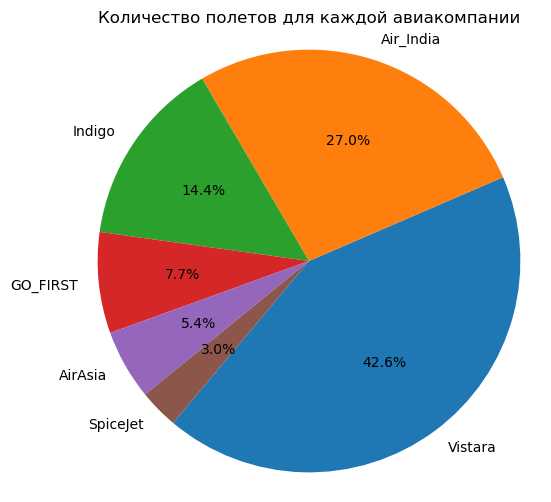

In [48]:
plt.figure(figsize=(6, 6)) 
plt.pie(airlines['count'], labels=airlines['airline'], autopct='%1.1f%%', startangle=230)   #autopct='%1.1f%%': отображение процентов с одним десятичным знаком.
plt.title('Количество полетов для каждой авиакомпании') 
plt.axis('equal') # Обеспечить круговую форму plt.show()

In [49]:
data.departure_time.info()


<class 'pandas.core.series.Series'>
RangeIndex: 300153 entries, 0 to 300152
Series name: departure_time
Non-Null Count   Dtype 
--------------   ----- 
300153 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [50]:
data.departure_time.describe()

count      300153
unique          6
top       Morning
freq        71146
Name: departure_time, dtype: object

In [51]:
clasize = data.groupby('class').size().sort_values(ascending=False).reset_index(name='count')

print(clasize)

      class   count
0   Economy  206666
1  Business   93487


Text(0.5, 1.0, 'кол-во перелетов по классу')

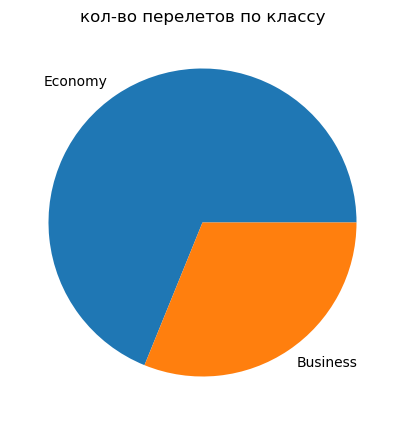

In [52]:

plt.figure(figsize=(5,5))   #создаем фигуру определенного размера
plt.pie(clasize['count'], labels=clasize['class'])
plt.title('кол-во перелетов по классу')

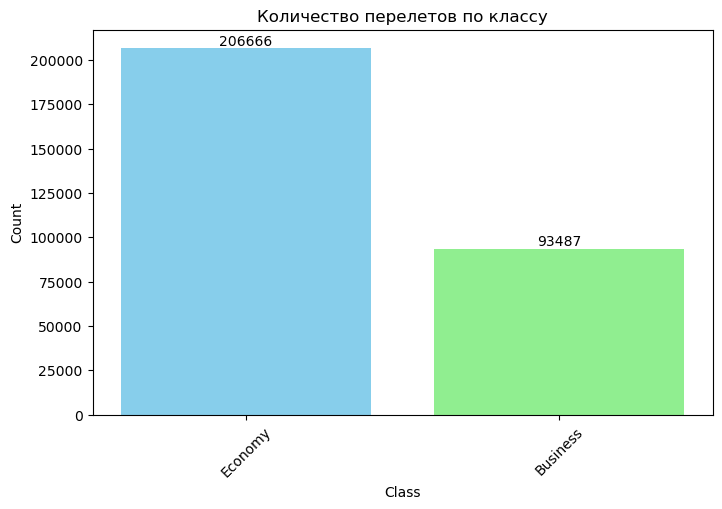

In [53]:
plt.figure(figsize=(8, 5)) 
bars = plt.bar(clasize['class'], clasize['count'], color=['skyblue', 'lightgreen'])
for bar in bars:                                                                                            # Добавление текстовых меток к столбцам
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xlabel('Class') 
plt.ylabel('Count')
plt.title('Количество перелетов по классу')
plt.xticks(rotation=45) 
plt.show()

In [55]:
source_city = data.groupby('class').agg(count=('class', 'size'), average_price=('price','mean')).reset_index()
print(source_city)

      class   count  average_price
0  Business   93487   52540.081124
1   Economy  206666    6572.342383


In [56]:
source_city = data.groupby('source_city').size().sort_values(ascending=False).reset_index(name='count')
print(source_city)

  source_city  count
0       Delhi  61343
1      Mumbai  60896
2   Bangalore  52061
3     Kolkata  46347
4   Hyderabad  40806
5     Chennai  38700


Text(0, 0.5, 'кол-во вылетов')

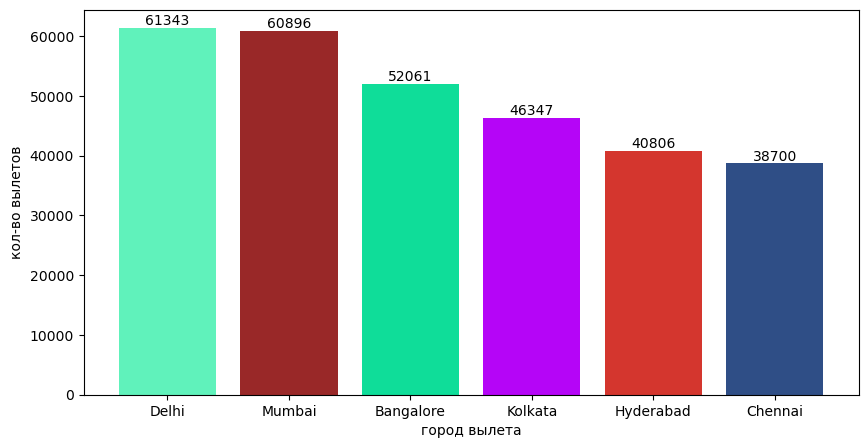

In [57]:
# Генерация случайных цветов 
np.random.seed(42) # Чтобы результаты были воспроизводимыми 
colors = np.random.rand(len(source_city), 3)            # Генерация случайных RGB цветов


plt.figure(figsize=(10,5))
bars = plt.bar(source_city['source_city'], source_city['count'], color=colors)
for bar in bars:                                                                                            # Добавление текстовых меток к столбцам
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.xlabel('город вылета')
plt.ylabel('кол-во вылетов')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_33980\2961386491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_city', y='count', data=source_city, palette='viridis', dodge=False)


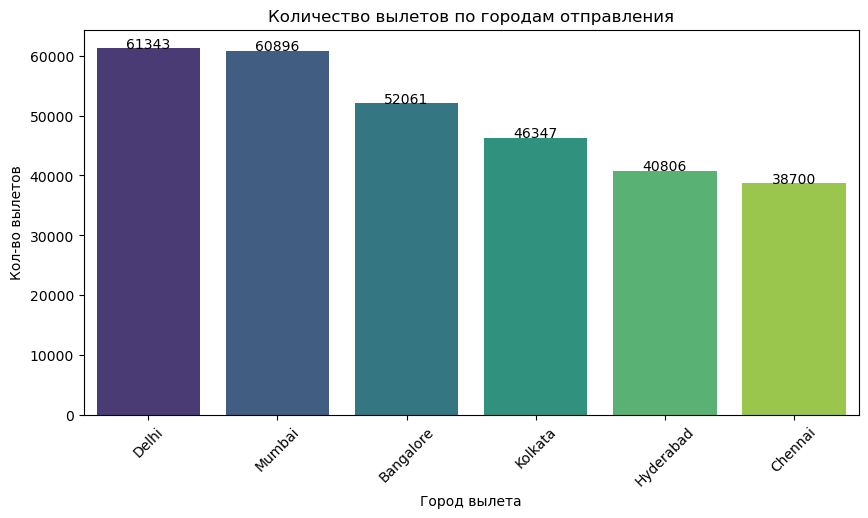

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(x='source_city', y='count', data=source_city, palette='viridis', dodge=False)
plt.legend([],[], frameon=False)

for index, row in source_city.iterrows(): 
    plt.text(index, row['count'], f'{row["count"]}', color='black', ha='center') 

plt.xlabel('Город вылета') 
plt.ylabel('Кол-во вылетов')
plt.title('Количество вылетов по городам отправления') 
plt.xticks(rotation=45)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_33980\90298485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_city', y='count', data=source_city, palette='viridis', dodge=False)


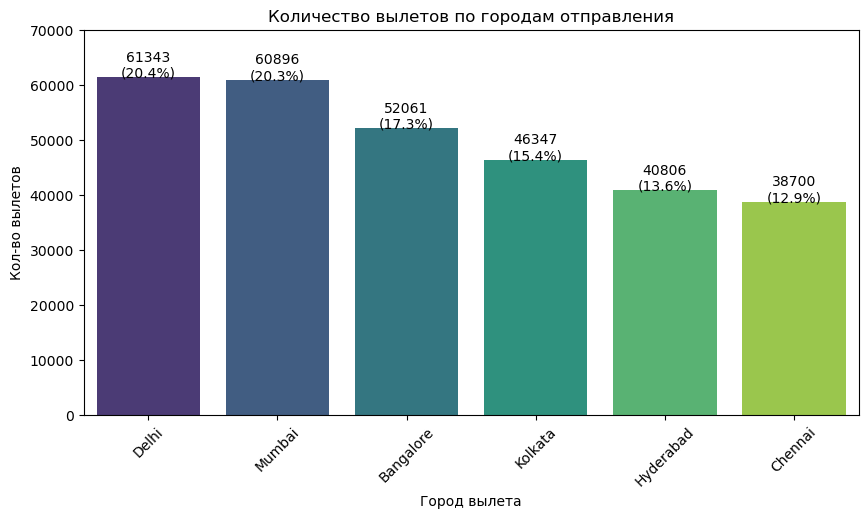

In [65]:
total_count = source_city['count'].sum()

plt.figure(figsize=(10, 5)) 
sns.barplot(x='source_city', y='count', data=source_city, palette='viridis', dodge=False) 
plt.legend([],[], frameon=False) 
# Добавление текстовых меток к столбцам 
for index, row in source_city.iterrows(): 
    count = row['count'] 
    percent = (count / total_count) * 100 
    plt.text(index, count, f'{count}\n({percent:.1f}%)', color='black', ha='center') 

plt.xlabel('Город вылета') 
plt.ylabel('Кол-во вылетов') 
plt.title('Количество вылетов по городам отправления') 
plt.xticks(rotation=45) 
# Установка диапазона оси Y до 70000 
plt.ylim(0, 70000)
plt.show()

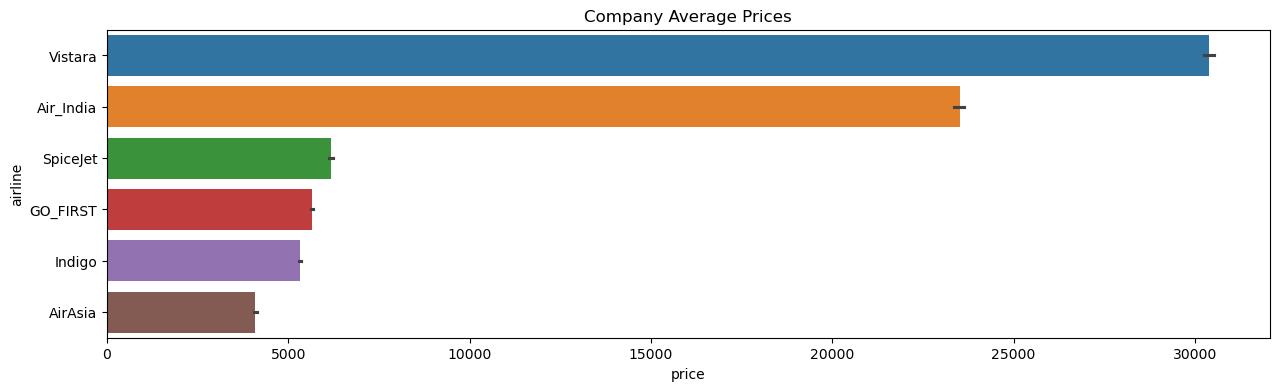

In [113]:
plt.figure(figsize=(15,4))
sns.barplot(x='price',y='airline', data=data.sort_values('price',ascending=False), hue='airline')
plt.title('Company Average Prices')
plt.xlabel('price',fontsize=10)
plt.ylabel('airline',fontsize=10)

plt.show()

In [64]:
data.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [122]:
stops = data.groupby('airline').airline.count().sort_values(ascending=False)

stops = stops.reset_index(name='кол-во')

print(stops)

     airline  кол-во
0    Vistara  127859
1  Air_India   80892
2     Indigo   43120
3   GO_FIRST   23173
4    AirAsia   16098
5   SpiceJet    9011


In [136]:
airstops = data[['airline', 'stops']]

print(airstops)

         airline stops
0       SpiceJet  zero
1       SpiceJet  zero
2        AirAsia  zero
3        Vistara  zero
4        Vistara  zero
...          ...   ...
300148   Vistara   one
300149   Vistara   one
300150   Vistara   one
300151   Vistara   one
300152   Vistara   one

[300153 rows x 2 columns]


In [150]:
pivot_df = airstops.pivot_table(index='airline', columns='stops', aggfunc='size', fill_value=0).reset_index()

print(pivot_df)

stops    airline     one  two_or_more   zero
0        AirAsia   11418         2246   2434
1      Air_India   71004         3479   6409
2       GO_FIRST   19545          405   3223
3         Indigo   31166          738  11216
4       SpiceJet    6549            0   2462
5        Vistara  111181         6418  10260


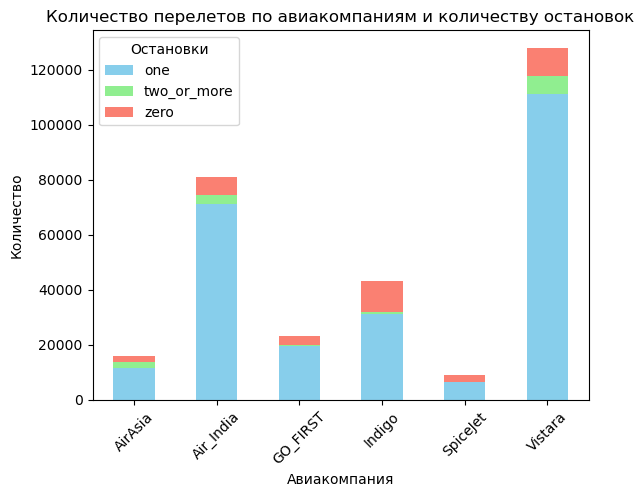

In [148]:
pivot_df.plot(kind='bar', x='airline', stacked=True, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Авиакомпания') 
plt.ylabel('Количество')
plt.title('Количество перелетов по авиакомпаниям и количеству остановок')
plt.legend(title='Остановки')
plt.xticks(rotation=45)
plt.show()

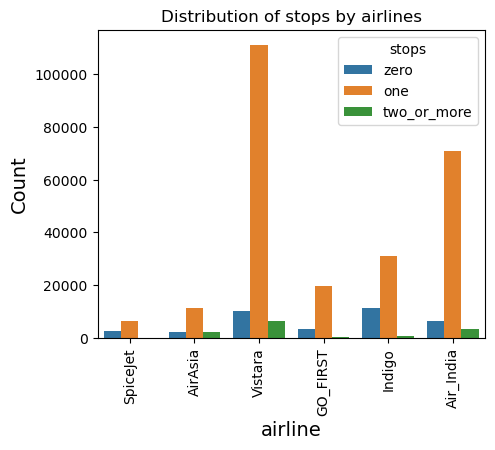

In [114]:
# Создание countplot. Задача визуализировать количество пересадок у каждой авиалинии
plt.figure(figsize=(5,4))
sns.countplot(x='airline',data=data ,hue='stops')
plt.title('Distribution of stops by airlines')
plt.xlabel('airline',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)
plt.show()

In [73]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [75]:
filtered_price_ec = data.loc[data['class'] == 'Economy'].reset_index()

print(filtered_price_ec)

         index  Unnamed: 0   airline   flight source_city departure_time stops   arrival_time destination_city    class  duration  days_left  price
0            0           0  SpiceJet  SG-8709       Delhi        Evening  zero          Night           Mumbai  Economy      2.17          1   5953
1            1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning           Mumbai  Economy      2.33          1   5953
2            2           2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning           Mumbai  Economy      2.17          1   5956
3            3           3   Vistara   UK-995       Delhi        Morning  zero      Afternoon           Mumbai  Economy      2.25          1   5955
4            4           4   Vistara   UK-963       Delhi        Morning  zero        Morning           Mumbai  Economy      2.33          1   5955
...        ...         ...       ...      ...         ...            ...   ...            ...              ...  

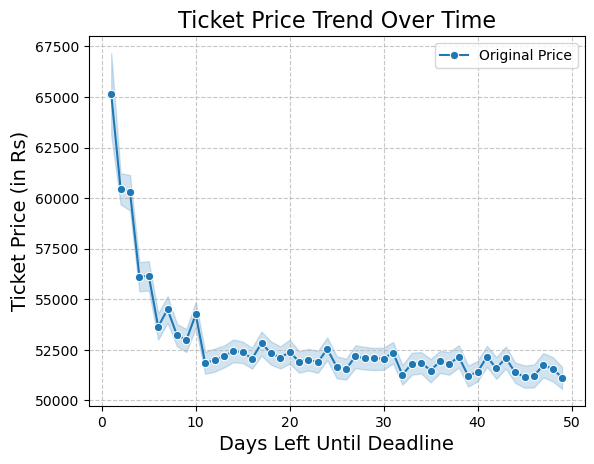

In [87]:
sns.lineplot(x='days_left', y='price', data=filtered_price_ec, label='Original Price', marker='o')
plt.xlabel('Days Left Until Deadline', fontsize=14)
plt.ylabel('Ticket Price (in Rs)', fontsize=14)
plt.title('Ticket Price Trend Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [85]:
filtered_price_bis = data.loc[data['class'] == 'Business'].reset_index()

print(filtered_price_bis)

        index  Unnamed: 0    airline  flight source_city departure_time stops arrival_time destination_city     class  duration  days_left  price
0      206666      206666  Air_India  AI-868       Delhi        Evening  zero      Evening           Mumbai  Business      2.00          1  25612
1      206667      206667  Air_India  AI-624       Delhi        Evening  zero        Night           Mumbai  Business      2.25          1  25612
2      206668      206668  Air_India  AI-531       Delhi        Evening   one        Night           Mumbai  Business     24.75          1  42220
3      206669      206669  Air_India  AI-839       Delhi          Night   one        Night           Mumbai  Business     26.50          1  44450
4      206670      206670  Air_India  AI-544       Delhi        Evening   one        Night           Mumbai  Business      6.67          1  46690
...       ...         ...        ...     ...         ...            ...   ...          ...              ...       ...       

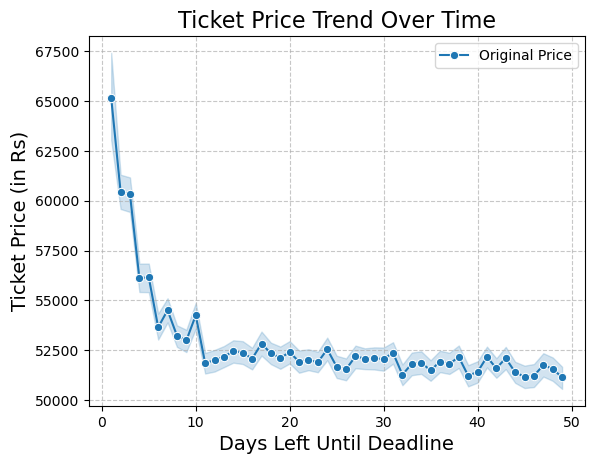

In [86]:
sns.lineplot(x='days_left', y='price', data=filtered_price_bis, label='Original Price', marker='o')
plt.xlabel('Days Left Until Deadline', fontsize=14)
plt.ylabel('Ticket Price (in Rs)', fontsize=14)
plt.title('Ticket Price Trend Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [100]:
business_raw = pd.read_csv('business.csv', sep=',')

# Удаление лишних пробелов и специальных символов в столбце 'stop'

business_raw['stop'] = business_raw['stop'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [101]:
business_raw

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop,17:00,Hyderabad,"81,585"


In [104]:
business_raw['price'] = business_raw['price'].str.replace(',','')
business_raw.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690


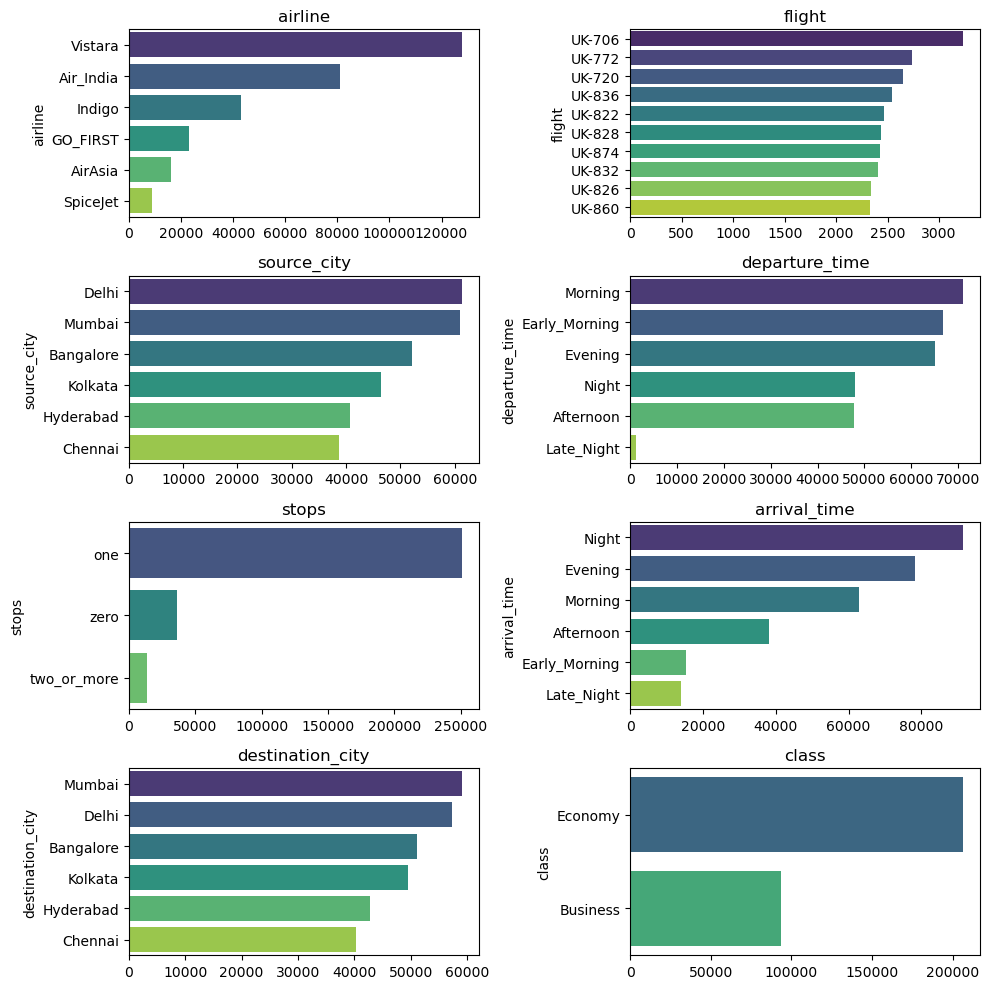

In [95]:
plt.figure(figsize=(10, 10))    # Создаем фигуру размером 10x10 дюймов
for i, feature in enumerate(data.select_dtypes(include="object").columns):  # Итерация по всем объектным столбцам
    counts = data[feature].value_counts().head(10)                          # Подсчет значений и выбор топ 10
    plt.subplot(4, 2, i+1)                                                  # Создание подграфика
    sns.barplot(x=counts.values, y=counts.index, hue=counts.index, palette='viridis', dodge=False)              # Построение столбчатой диаграммы
    plt.legend([],[], frameon=False)        # Скрываем легенду
    plt.title(f"{feature}")
plt.tight_layout()                          # Оптимизация размещения графиков
plt.show()


In [111]:
economy_raw = pd.read_csv('economy.csv', sep=',')
economy_raw['stop'] = economy_raw['stop'].str.replace(r'\s+', ' ', regex=True).str.strip()
economy_raw

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop,09:05,Hyderabad,"8,640"


In [109]:
economy_raw['price'] = economy_raw['price'].str.replace(',','')
economy_raw.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955
